# Spillover effects: establishing different buffers

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scale for maps
from matplotlib_scalebar.scalebar import ScaleBar
# Personalised legends for maps
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import os

import geopandas as gpd
import rasterio as rio
import fiona
import contextily
import osmnx
from shapely import geometry

In [2]:
# Set working directory
os.chdir("/Users/unaioyon/Desktop/masters_thesis/data/fra")

In [23]:
# Zones 30
zones = gpd.read_file("zones_30/zones-30.shp") # EPSG:4326
# Arrondissements
arr = gpd.read_file("arrondissements/arrondissements.shp")

In [24]:
# Change to a projected CRS (i.e., in meters)
zones.to_crs("EPSG:2154", inplace = True) # that is, Lambert 93
arr.to_crs("EPSG:2154", inplace = True) # that is, Lambert 93



In [14]:
zones.head()

,nom_zca,date_arr,month,year,type_arr,arrdt,reglement,geometry
0,Marché Saint Honoré,NaN,NaN,NaN,NaN,1,ZONE 30,"POLYGON ((650807.339 6863179.439, 650732.293 6..."
1,Eylau,2014-01-14 02:00:00+01:00,01,2014,PP,16,ZONE 30,"POLYGON ((647630.869 6862816.049, 647576.962 6..."
2,Sorbier,2010-06-15 04:00:00+02:00,06,2010,MDP AVEC C,20,ZONE 30,"POLYGON ((655065.100 6862750.865, 654808.754 6..."
3,Moselle,2010-07-02 04:00:00+02:00,07,2010,MDP AVEC C,19,ZONE 30,"POLYGON ((653814.779 6864953.761, 653865.195 6..."
4,Parmentier,2018-08-07 04:00:00+02:00,08,2018,CONJOINT,11,ZONE 30,"POLYGON ((654090.028 6863008.233, 653467.618 6..."


In [20]:
# Now, select zones implemented in 2010
zones10 = zones.loc[zones["year"] == "2010",:]

# Dissolve
zones10_g = zones10.dissolve()

In [31]:
type(zones10_g.loc[0,"geometry"])

shapely.geometry.multipolygon.MultiPolygon

<AxesSubplot: >

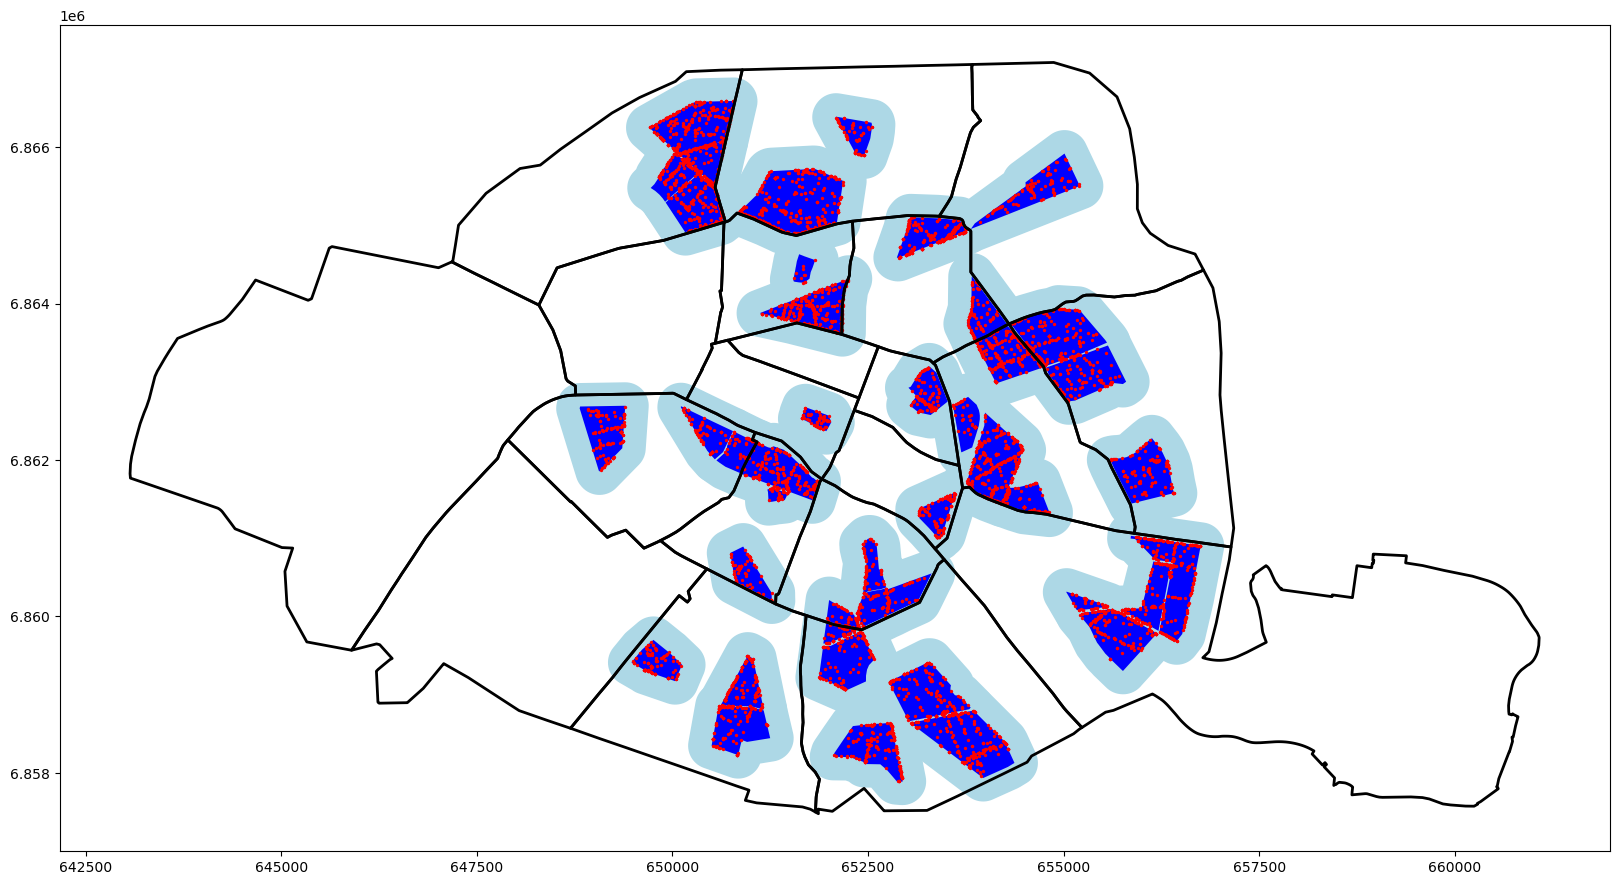

In [37]:
fig, ax = plt.subplots(1, figsize = (20, 20))
arr.boundary.plot(ax = ax, linewidth = 2, color = "black")
zones10["geometry"].buffer(distance = 300).plot(ax = ax, color = "lightblue")
#zones10["geometry"].buffer(distance = 50).boundary.plot(ax = ax, color = "darkblue")
zones10["geometry"].plot(color = "blue", ax = ax)
acc10_treated.plot(ax = ax, markersize = 2, color = "red")


In [27]:
# Import accident data
acc = gpd.read_file("/Users/unaioyon/Desktop/masters_thesis/data/fra/accidents/final/accidents_final_geo.geojson")

In [29]:
# Change CRS
acc.to_crs("EPSG:2154", inplace = True)

In [32]:
# Select just those inside the 2010 slow zones
acc10_treated = acc.loc[acc["geometry"].within(zones10_g.loc[0,"geometry"]),:]

In [39]:
# Select outside of different buffers for 2010 areas
acc10_buffer_100 = acc.loc[acc["geometry"].within(zones10_g.loc[0,"geometry"].buffer(distance = 100)) == False,:]
acc10_buffer_100["buffer100"] = 1
acc10_buffer_200 = acc.loc[acc["geometry"].within(zones10_g.loc[0,"geometry"].buffer(distance = 200)) == False,:]
acc10_buffer_200["buffer200"] = 1
acc10_buffer_300 = acc.loc[acc["geometry"].within(zones10_g.loc[0,"geometry"].buffer(distance = 300)) == False,:]
acc10_buffer_300["buffer300"] = 1

/opt/anaconda3/envs/geo_env/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/envs/geo_env/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/envs/geo_env/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [43]:
# Now, select outside of different buffers for ALL areas
zones_g = zones.dissolve()
acc10_buffer_all = acc.loc[acc["geometry"].within(zones_g.loc[0,"geometry"].buffer(distance = 200)) == False,:]


In [46]:
# Save the geodataframes separately
acc10_treated.to_file("accidents/spillovers/treated_2010.geojson")
acc10_buffer_100.to_file("accidents/spillovers/buffer_100_2010.geojson")
acc10_buffer_200.to_file("accidents/spillovers/buffer_200_2010.geojson")
acc10_buffer_300.to_file("accidents/spillovers/buffer_300_2010.geojson")
acc10_buffer_all.to_file("accidents/spillovers/buffer_all_2010.geojson")

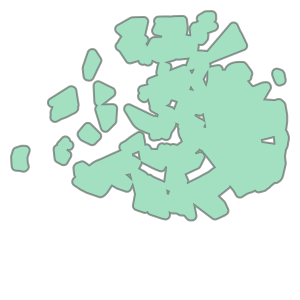

In [66]:
zones.dissolve().loc[0,"geometry"].buffer(distance = 200)

In [67]:
# Select accidents which are inside the buffer but not inside the slow zone
acc_buffer_200 = acc.loc[(acc["geometry"].within(zones.dissolve().loc[0,"geometry"].buffer(distance = 200))) &
                         (acc["geometry"].within(zones.dissolve().loc[0,"geometry"]) == False),:]

In [80]:
# Dissolve all zones
zones_g = zones.dissolve()

In [95]:
gpd.GeoDataFrame(zones_g["geometry"].buffer(distance = 200),
                geometry = 0)

,0
0,"MULTIPOLYGON (((647717.343 6859640.715, 647717..."


In [91]:
arr_g

,geometry,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre
0,"POLYGON ((651762.754 6857536.349, 651662.171 6...",750000011,11,75111,11Ã¨me Ardt,Popincourt,750001537,3.665442e+06,8282.011886


In [96]:
# Get area of arr that is not inside the buffer or LSZ
arr_g = arr.dissolve()
arr_g_o = arr_g.overlay(gpd.GeoDataFrame(zones_g["geometry"].buffer(distance = 200),
                geometry = 0), how = "difference")

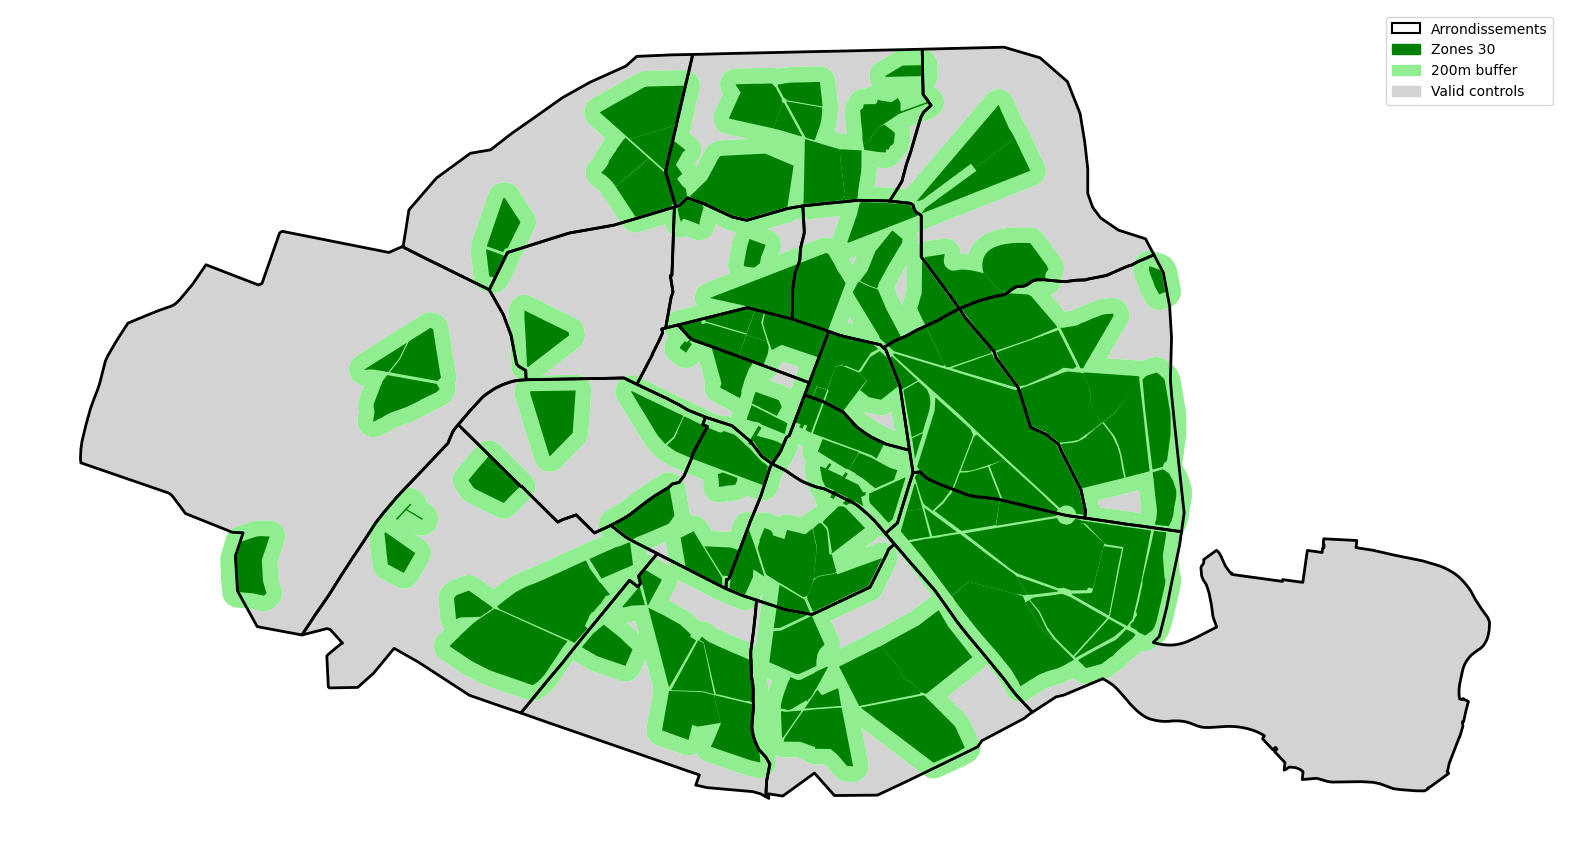

In [100]:
#### PLOTTTTT for ALL years


# Generating a personalised legend
legend_overlap1 = [Patch(facecolor="white", edgecolor="black", linewidth = 1.5,
                         label="Arrondissements"),
                   Patch(facecolor="green", edgecolor="green", alpha = 1,
                         label="Zones 30"),
                   Patch(facecolor="lightgreen", edgecolor="lightgreen", alpha = 1,
                         label="200m buffer"),
                   Patch(facecolor="lightgrey", edgecolor="lightgrey", alpha = 1,
                         label="Valid controls")]

fig, ax = plt.subplots(1, figsize = (20, 20))

arr.boundary.plot(ax = ax, linewidth = 2, color = "black")
# ALL ZONES WITH BUFFER
arr_g_o.plot(ax = ax, color = "lightgrey")
zones["geometry"].buffer(distance = 200).plot(ax = ax, color = "lightgreen")
zones["geometry"].plot(color = "green", ax = ax)

ax.axis("off")

ax.legend(handles=legend_overlap1, loc="best")

In [101]:
fig.savefig("/Users/unaioyon/Desktop/masters_thesis/graphs/spillover2.pdf")

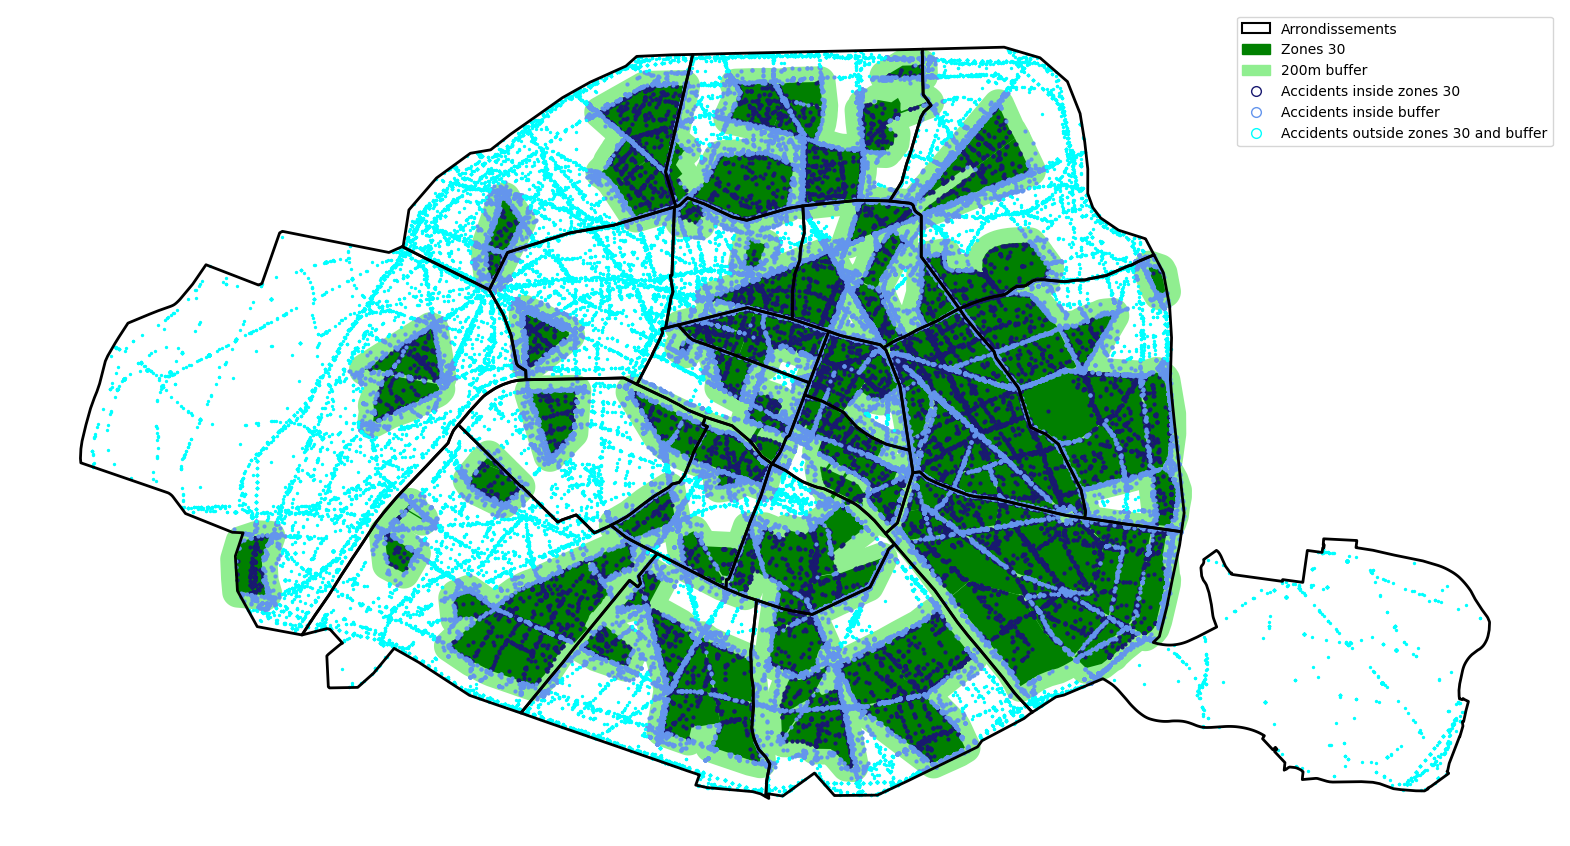

In [87]:
#### PLOTTTTT for ALL years


# Generating a personalised legend
legend_overlap1 = [Patch(facecolor="white", edgecolor="black", linewidth = 1.5,
                         label="Arrondissements"),
                   Patch(facecolor="green", edgecolor="green", alpha = 1,
                         label="Zones 30"),
                   Patch(facecolor="lightgreen", edgecolor="lightgreen", alpha = 1,
                         label="200m buffer"),
                   Line2D([0], [0], marker="o", color="white",label="Accidents inside zones 30",
                          markeredgecolor="midnightblue", markersize=7),
                   Line2D([0], [0], marker="o", color="white",label="Accidents inside buffer",
                          markeredgecolor="cornflowerblue", markersize=7),
                   Line2D([0], [0], marker="o", color="white",label="Accidents outside zones 30 and buffer",
                          markeredgecolor="aqua", markersize=7)]

fig, ax = plt.subplots(1, figsize = (20, 20))

arr.boundary.plot(ax = ax, linewidth = 2, color = "black")
# ALL ZONES WITH BUFFER
zones["geometry"].buffer(distance = 200).plot(ax = ax, color = "lightgreen")
zones["geometry"].plot(color = "green", ax = ax)
# Accidents inside all LSZs
acc.loc[acc["geometry"].within(zones_g.loc[0,"geometry"]),:].plot(ax = ax, markersize = 4, color = "midnightblue")
# accidents inside the buffer
acc_buffer_200.plot(ax = ax, markersize = 4, color = "cornflowerblue")
# accidents outside buffer
acc10_buffer_all.plot(ax = ax, markersize = 2, color = "aqua")
#acc.plot(ax = ax, color = "red", markersize = 3)
ax.axis("off")

ax.legend(handles=legend_overlap1, loc="best")

In [88]:
fig.savefig("/Users/unaioyon/Desktop/masters_thesis/graphs/spillover1.pdf")